##### Implement K-Nearest Neighbors algorithm on diabetes.csv dataset.  
Compute confusion ma- trix,  accuracy,  error  rate,  precision  and  recall  on  the  given  dataset.   
Dataset  link  : https://www.kaggle.com/datasets/abdallamahgoub/diabetes


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score


In [12]:
# Step 2: Load dataset
df = pd.read_csv("diabetes.csv") 
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Display basic info
print(df.info()) 
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1) 
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       

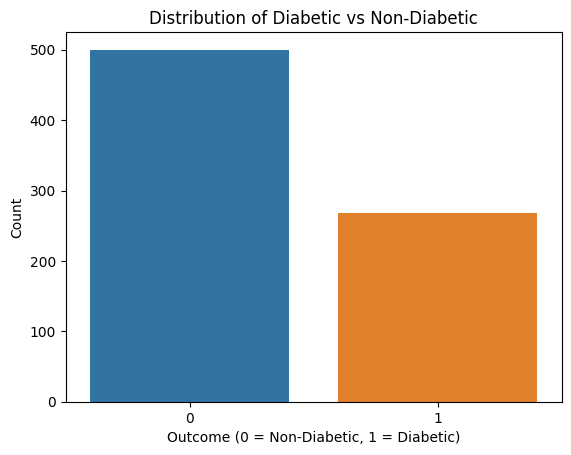

In [14]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Diabetic vs Non-Diabetic") 
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)") 
plt.ylabel("Count")
plt.show()


In [15]:
# Choose number of neighbors
k = 5

# Initialize model
knn = KNeighborsClassifier(n_neighbors=k)

# Train model
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)


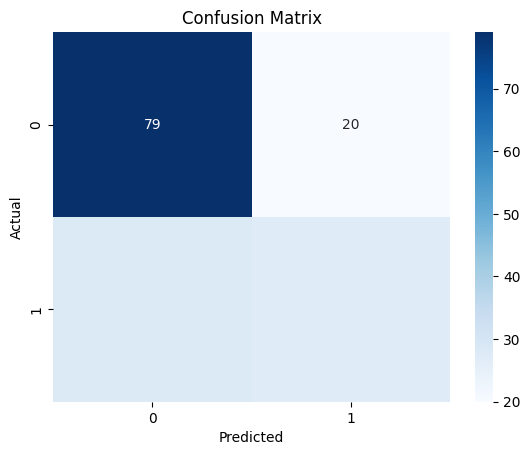

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted")
plt.ylabel("Actual") 
plt.show()


In [17]:
# Compute metrics
accuracy = accuracy_score(y_test, y_pred) 
error_rate = 1 - accuracy
precision  =  precision_score(y_test,  y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4)) 
print("Error Rate:", round(error_rate, 4)) 
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))


Accuracy: 0.6883
Error Rate: 0.3117
Precision: 0.5745
Recall: 0.4909
F1-Score: 0.5294


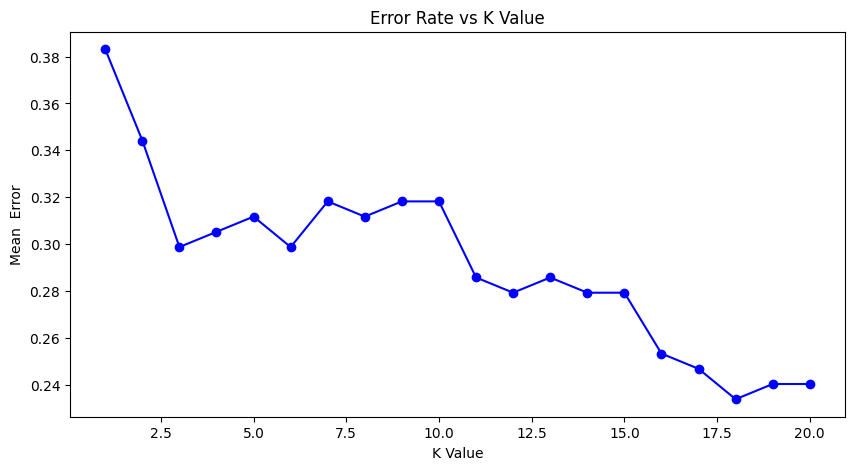

In [18]:
error = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test) 
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1, 21), error, marker='o', color='blue') 
plt.title('Error Rate vs K Value')
plt.xlabel('K Value') 
plt.ylabel('Mean  Error') 
plt.show()
